In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [55]:
df=pd.read_csv('data.csv',sep=';')
len(np.where(df.isnull())[0])
# no null values

0

In [56]:
df=df[['Marital status', 'Application order', 
       'Daytime/evening attendance\t', 'Previous qualification (grade)',
       "Mother's qualification", "Father's qualification",
       'Admission grade','Displaced','Educational special needs', 
       'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International','Target']]
df=df.rename(columns={'Daytime/evening attendance\t':'Daytime/evening attendance','Previous qualification (grade)':'Previous qualification grade'})

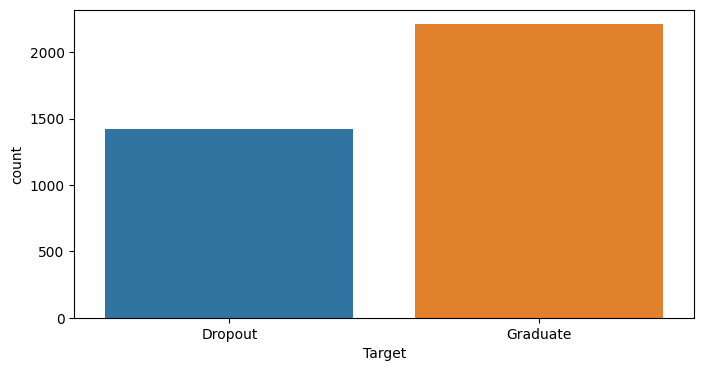

In [57]:
df_enrolled=df[df['Target']=='Enrolled'].drop('Target',axis=1)
df=df[df['Target']!='Enrolled']
# dropping students with 'Enrolled' status, because these observations won't help build or test a model
plt.figure(figsize=(8,4))
sns.countplot(df,x='Target')
plt.show()
# data is only slightly imbalanced

In [58]:
# There are lots of categorical variables. Some of these have to be grouped/simplified in order to avoid creating a dataframe with too many dimensions.
maps=[
('Marital status',{3:1,5:1,1:0,2:0,4:0,6:0}), # 1's are legally recognised relationships, while the rest is either 'single' or out of a relationship like 'divorced'
('Application order',{0:1,1:0,2:0,3:0,4:0,5:0,6:0}), # 1 stands for 'first choice', while the rest will be grouped as not the first choice
("Mother's qualification",{1:0,2:1,3:1,4:2,5:3,6:0,9:0,10:0,11:0,12:0,14:0,15:0,18:0,19:0,22:0,26:0,27:0,29:0,30:0,34:np.nan,35:0,36:0,37:0,
                           38:0,39:0,40:1,41:1,42:1,43:2,44:3}), # 0 stands for no diploma, 1 for graduate (with or without extra courses), 2 for master and 3 for phd holder
("Father's qualification",{1:0,2:1,3:1,4:2,5:3,6:0,9:0,10:0,11:0,12:0,14:0,15:0,18:0,19:0,22:0,26:0,27:0,29:0,30:0,34:np.nan,35:0,36:0,37:0,38:0,39:0,40:1,41:1,42:1,43:2,44:3}),
('Target',{'Dropout':0,'Graduate':1})]
for i in maps:
    df[i[0]]=df[i[0]].map(i[1])
for i in range(0,4):
    df_enrolled[maps[i][0]]=df_enrolled[maps[i][0]].map(maps[i][1])
# We are left with 10 binary, 3 quasi-continous and 2 ordinal variables.

In [59]:
# 241 observations are missing information about parents qualifications - these shall be dropped
len(np.where(df.isnull())[0])
df,df_enrolled=df.dropna(),df_enrolled.dropna()
df=df.astype({"Mother's qualification":'int64',"Father's qualification":'int64'})
df_enrolled=df_enrolled.astype({"Mother's qualification":'int64',"Father's qualification":'int64'})

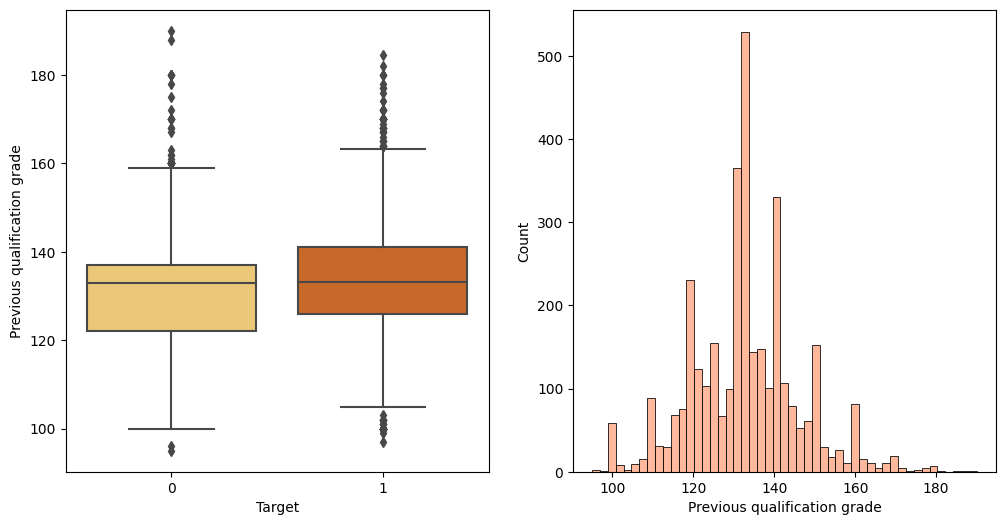

Kruskal-Wallis H-test p-value = 0.0


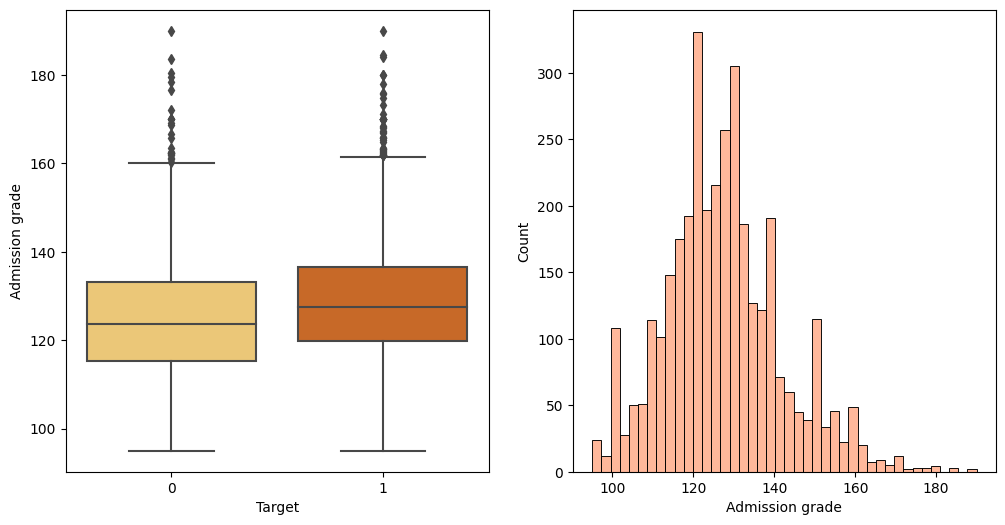

Kruskal-Wallis H-test p-value = 0.0


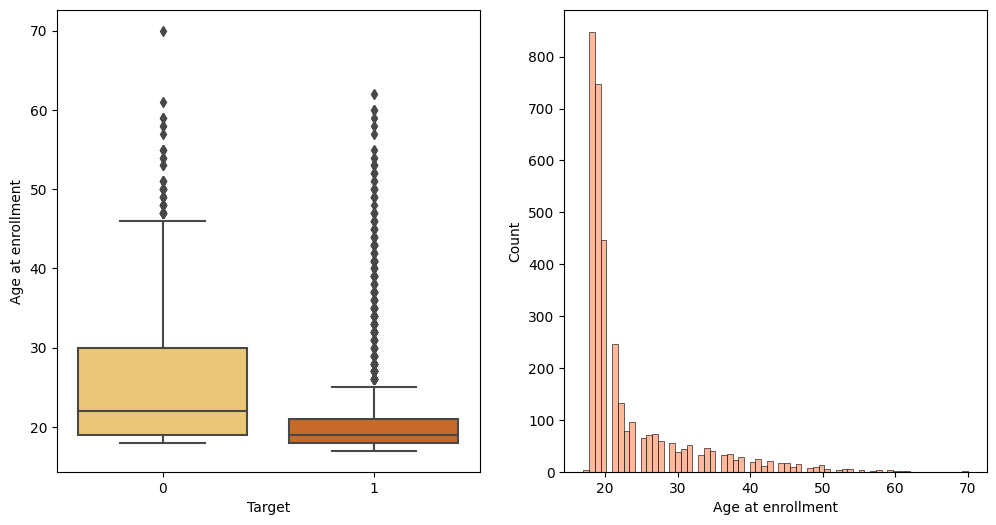

Kruskal-Wallis H-test p-value = 0.0


In [60]:
# Examining the numerical variables
for i in ['Previous qualification grade','Admission grade','Age at enrollment']:
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
    sns.boxplot(df,x='Target',y=i,palette='YlOrBr',ax=ax1)
    sns.histplot(df[i],color='lightsalmon',ax=ax2)
    plt.show()
    p=stats.kruskal(df[df['Target']==0][i],df[df['Target']==1][i],nan_policy='raise').pvalue
    print(f'Kruskal-Wallis H-test p-value = {round(p,4)}')
# Things to note: 
# - there are no extreme outliers, 
# - people with higher age of enrollment should be more likely to drop out
# - the median value of each varaible in each group (dropouts vs graduates) 
#   is not equal, which suggests that the numerical variables are dependent with target variable

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,3486.0,0.006885,0.082700,0.0,0.0,0.0,0.0,1.0
Application order,3486.0,0.000287,0.016937,0.0,0.0,0.0,0.0,1.0
Daytime/evening attendance,3486.0,0.895295,0.306216,0.0,1.0,1.0,1.0,1.0
Previous qualification grade,3486.0,132.947504,13.250238,95.0,125.0,133.1,140.0,190.0
Mother's qualification,3486.0,0.154618,0.425736,0.0,0.0,0.0,0.0,3.0
Father's qualification,3486.0,0.109581,0.378072,0.0,0.0,0.0,0.0,3.0
Admission grade,3486.0,127.496959,14.567873,95.0,118.2,126.6,135.6,190.0
Displaced,3486.0,0.552209,0.497338,0.0,0.0,1.0,1.0,1.0
Educational special needs,3486.0,0.011474,0.106518,0.0,0.0,0.0,0.0,1.0
Debtor,3486.0,0.114745,0.318759,0.0,0.0,0.0,0.0,1.0


In [62]:
# Feature selection - categorical variables
# These will be chosen based on the Pearson's chi-squared test (at the standard 0.05 significance level)
cats=['Marital status', 'Application order', 'Daytime/evening attendance',
       "Mother's qualification","Father's qualification",'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder','International']
dep_cats=[]
for k in cats:
    cross=pd.crosstab(df[k],df['Target'])
    for i in [0,1]: # checking the expected value assumption
        for j in range(0,len(df[k].unique())):
            if cross[i].sum()*cross.iloc[j].sum()/len(df)<5:
                p=stats.chi2_contingency(cross,correction=True).pvalue # applying Yate's correction if the condition isn't met
            else:
                p=stats.chi2_contingency(cross).pvalue
    if p<=0.05: # reject the null hypothesis on the independence of variables
        dep_cats.append((k,round(p,4)))
print('Features dependent with target variable:')
for i in dep_cats:
    print(f"'{i[0]}' (Pearson's chi2 test p-value = {i[1]})")

Features dependent with target variable:
'Daytime/evening attendance' (Pearson's chi2 test p-value = 0.0)
'Father's qualification' (Pearson's chi2 test p-value = 0.0291)
'Displaced' (Pearson's chi2 test p-value = 0.0)
'Debtor' (Pearson's chi2 test p-value = 0.0)
'Tuition fees up to date' (Pearson's chi2 test p-value = 0.0)
'Gender' (Pearson's chi2 test p-value = 0.0)
'Scholarship holder' (Pearson's chi2 test p-value = 0.0)


In [63]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
# The roc-auc score is known for being a overall good metric 
# for regular (balanced and binary like this one) classification problems

In [64]:
X=df[["Father's qualification","Displaced","Debtor",
"Tuition fees up to date","Gender","Scholarship holder",
'Previous qualification grade','Admission grade','Age at enrollment']]
y=df['Target']
df_enrolled=df_enrolled[["Father's qualification","Displaced","Debtor",
"Tuition fees up to date","Gender","Scholarship holder",
'Previous qualification grade','Admission grade','Age at enrollment']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2812,stratify=y)

In [13]:
param_grid={'n_estimators':[50,100,150,200],
            'criterion':['gini','entropy'],
            'max_depth':[3,5,7],
            'max_features':np.arange(0.2,1.1,0.2),
            'random_state':[2812],'n_jobs':[-1]}
gs_rf=GridSearchCV(RandomForestClassifier(),param_grid,scoring='roc_auc',cv=5)
gs_rf.fit(X_train,y_train)
rf=gs_rf.best_estimator_
y_pred=rf.fit(X_train,y_train).predict(X_test)
print('Best parameters:')
gs_rf.best_params_

Best parameters:


{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 0.2,
 'n_estimators': 150,
 'n_jobs': -1,
 'random_state': 2812}

In [14]:
# comparing to a standard random forest classifier
rf_std=RandomForestClassifier(random_state=2812,n_jobs=-1)
y_pred_std=rf_std.fit(X_train,y_train).predict(X_test)
print(f'Optimized Random Forest Classifier ROC-AUC score: {roc_auc_score(y_pred,y_test)}\nRegular Random Forest Classifier ROC-AUC score: {roc_auc_score(y_pred_std,y_test)}')

Optimized Random Forest Classifier ROC-AUC score: 0.7672211021505376
Regular Random Forest Classifier ROC-AUC score: 0.7176072170522781


In [15]:
param_grid={'n_neighbors':[x for x in range(1,10)],
            'algorithm':['brute'],
            'p':[1,2],
            'n_jobs':[-1]}
gs_knn=GridSearchCV(KNeighborsClassifier(),param_grid,scoring='roc_auc',cv=5)
gs_knn.fit(X_train,y_train)
knn=gs_knn.best_estimator_
y_pred=knn.fit(X_train,y_train).predict(X_test)
print('Best parameters:')
gs_knn.best_params_

Best parameters:


{'algorithm': 'brute', 'n_jobs': -1, 'n_neighbors': 9, 'p': 1}

In [16]:
# Comparing to a standard knn classifier
knn_std=KNeighborsClassifier(n_jobs=-1)
y_pred_std=knn_std.fit(X_train,y_train).predict(X_test)
print(f'Optimized KNN Classifier ROC-AUC score: {roc_auc_score(y_pred,y_test)}\nRegular KNN Classifier ROC-AUC score: {roc_auc_score(y_pred_std,y_test)}')

Optimized KNN Classifier ROC-AUC score: 0.713772193389784
Regular KNN Classifier ROC-AUC score: 0.6370697173344277


In [23]:
param_grid={'C':[0.1,1,10],
            'random_state':[2812],
            'max_iter':[100000000]}
gs_lsvc=GridSearchCV(LinearSVC(),param_grid,scoring='roc_auc',cv=5)
gs_lsvc.fit(X_train,y_train)
lsvc=gs_lsvc.best_estimator_
y_pred=lsvc.fit(X_train,y_train).predict(X_test)
print('Best parameters')
gs_lsvc.best_params_
# Max iteractions of the optimization algorithm need to be high, beacause some models failed to converge on lower levels

Best parameters


{'C': 0.1, 'max_iter': 100000000, 'random_state': 2812}

In [24]:
lsvc_std=LinearSVC(random_state=2812)
lsvc_std.fit(X_train,y_train)
y_pred_std=lsvc_std.predict(X_test)
print(f'Optimized Linear SV Classifier ROC-AUC score: {roc_auc_score(y_pred,y_test)}\nRegular Linear SV Classifier ROC-AUC score: {roc_auc_score(y_pred_std,y_test)}')
# Not much of an improvement over the regular, non-convergent (not fully optimised) classifier, especially when considering the amount of time needed for tuning.
# However, the Support Vector Machine Classifier has proven to be the best choice. 
# Area under ROC curve of ~0.8 is an excellent result.

Optimized Linear SV Classifier ROC-AUC score: 0.7923347398030942
Regular Linear SV Classifier ROC-AUC score: 0.7772769149776257


c:\Users\DoSpa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


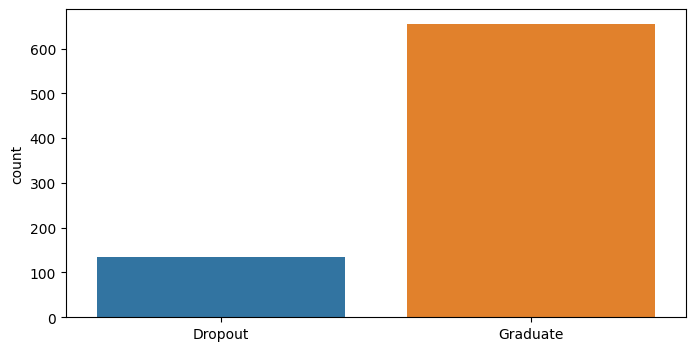

In [116]:
# Here the forecast of how many students will graduate.
plt.figure(figsize=(8,4))
sns.countplot(x=np.where(lsvc.predict(df_enrolled)==1,'Graduate','Dropout'),order=['Dropout','Graduate'])
plt.show()